In [32]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/EKF_y_Temp.csv')

print("DataFrame Info (Column details and data types):")
df.info()

DataFrame Info (Column details and data types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276989 entries, 0 to 276988
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   elapsed time  276989 non-null  float64
 1   timestamp     276989 non-null  float64
 2   topic         276989 non-null  object 
 3   value         276989 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.5+ MB


In [33]:
display(df.head())


,elapsed time,timestamp,topic,value
0,0.327143,1.760117e+09,/estimation/ekf/gnss/vehicle_state.status,1.0
1,0.343679,1.760117e+09,/estimation/ekf/gnss/vehicle_state.status,1.0
2,0.352052,1.760117e+09,/estimation/ekf/gnss/vehicle_state.status,1.0
3,0.362261,1.760117e+09,/estimation/ekf/gnss/vehicle_state.status,1.0
4,0.376671,1.760117e+09,/estimation/ekf/gnss/vehicle_state.status,1.0


Now, let's look at the descriptive statistics for the numerical columns.

In [34]:
# Display the unique values and their counts in the 'topic' column
display(df['topic'].value_counts())

,count
topic,
/estimation/ekf/nav_sat_fix.position_covariance[:],137214
/imu/temp.temperature,20341
/estimation/ekf/vehicle_state.vy,19919
/estimation/ekf/vehicle_state.vx,19919
/estimation/ekf/gnss/vehicle_state.vy,19899
/estimation/ekf/gnss/vehicle_state.vx,19899
/estimation/ekf/gnss/vehicle_state.status,19899
/estimation/ekf/gnss/vehicle_state.yaw_rate,19899


In [35]:
# Create a dictionary to hold DataFrames for each topic
topic_dataframes = {}

# Get unique topics
unique_topics = df['topic'].unique()

# Iterate through each unique topic and create a DataFrame
for topic_name in unique_topics:
    # Filter the original DataFrame for the current topic
    topic_df = df[df['topic'] == topic_name][['timestamp', 'value']].copy()
    # Set timestamp as index for clarity
    topic_df = topic_df.set_index('timestamp')
    # Store the DataFrame in the dictionary
    topic_dataframes[topic_name] = topic_df

print(f"Created {len(topic_dataframes)} DataFrames, one for each unique topic.")
print("Here's an example of the DataFrame for the first topic:")

# Display the DataFrame for the first topic as an example
first_topic_name = list(topic_dataframes.keys())[0]
display(topic_dataframes[first_topic_name].head())

Created 8 DataFrames, one for each unique topic.
Here's an example of the DataFrame for the first topic:


,value
timestamp,
1.760117e+09,1.0
1.760117e+09,1.0
1.760117e+09,1.0
1.760117e+09,1.0
1.760117e+09,1.0


In [36]:
# Iterate through the dictionary of topic DataFrames
for topic_name, topic_df in topic_dataframes.items():
    print(f"\nDescriptive Statistics for Topic: {topic_name}")
    display(topic_df.describe())


Descriptive Statistics for Topic: /estimation/ekf/gnss/vehicle_state.status


,value
count,19899.000000
mean,0.867481
std,0.616454
min,-2.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000



Descriptive Statistics for Topic: /estimation/ekf/gnss/vehicle_state.vx


,value
count,19899.000000
mean,2.357981
std,1.341799
min,-1.097387
25%,1.331924
50%,2.041632
75%,3.410166
max,5.543695



Descriptive Statistics for Topic: /estimation/ekf/gnss/vehicle_state.vy


,value
count,19899.000000
mean,0.378189
std,0.898224
min,-1.512912
25%,-0.240675
50%,0.136818
75%,0.921406
max,2.748366



Descriptive Statistics for Topic: /estimation/ekf/vehicle_state.vy


,value
count,19919.000000
mean,0.129771
std,0.656524
min,-1.062499
25%,-0.290496
50%,-0.010670
75%,0.397286
max,2.065733



Descriptive Statistics for Topic: /estimation/ekf/gnss/vehicle_state.yaw_rate


,value
count,19899.000000
mean,0.024196
std,0.073716
min,-0.106690
25%,-0.004459
50%,0.005406
75%,0.020262
max,0.513482



Descriptive Statistics for Topic: /estimation/ekf/vehicle_state.vx


,value
count,19919.000000
mean,2.523976
std,1.395301
min,0.296607
25%,1.383996
50%,2.163873
75%,3.611328
max,5.686921



Descriptive Statistics for Topic: /imu/temp.temperature


,value
count,20341.000000
mean,36.981325
std,0.094840
min,36.784836
25%,36.903999
50%,36.997253
75%,37.064606
max,37.126781



Descriptive Statistics for Topic: /estimation/ekf/nav_sat_fix.position_covariance[:]


,value
count,137214.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


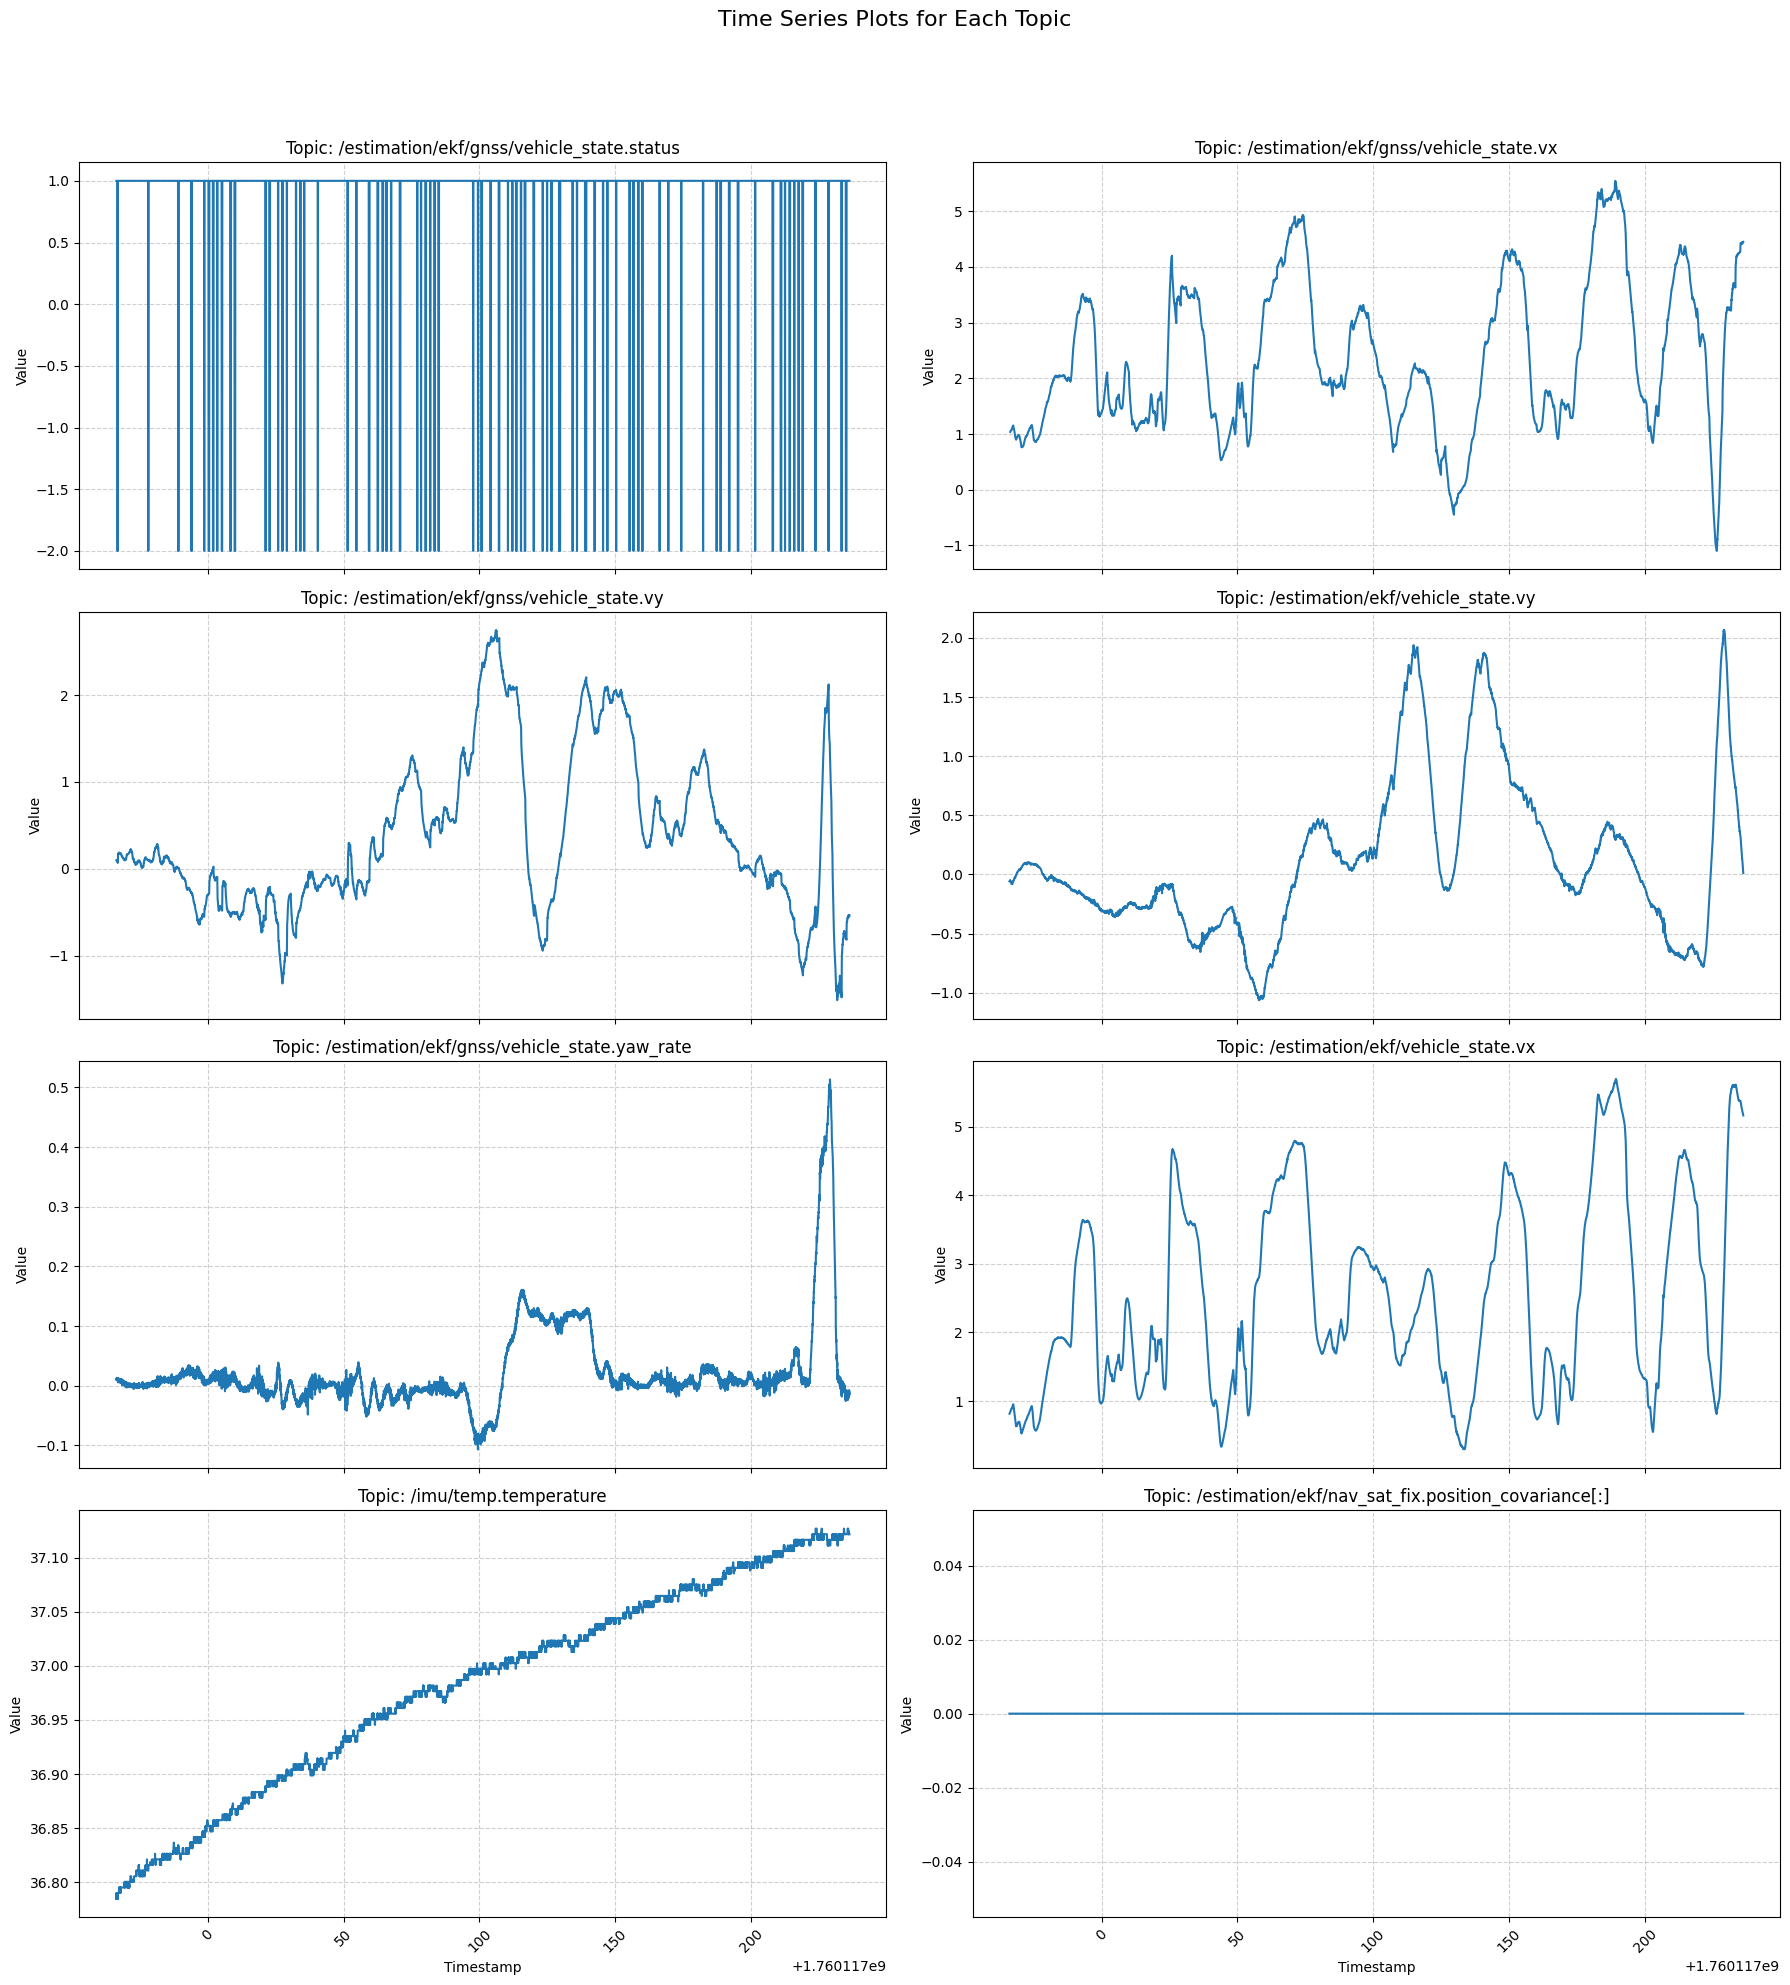

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of plots (which is the number of unique topics)
num_topics = len(topic_dataframes)

# Calculate the grid size for the subplots
# For 8 plots, a 4x2 or 2x4 grid would work well.
# Let's go with 4 rows and 2 columns for better readability if topic names are long.
n_rows = 4
n_cols = 2

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 20), sharex=True, layout='tight')
# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, (topic_name, topic_df) in enumerate(topic_dataframes.items()):
    ax = axes[i]
    # Plot the 'value' column against the timestamp index
    sns.lineplot(x=topic_df.index, y='value', data=topic_df, ax=ax)
    ax.set_title(f'Topic: {topic_name}', fontsize=12)
    ax.set_xlabel('Timestamp', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide any unused subplots if the number of topics is less than n_rows * n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.suptitle('Time Series Plots for Each Topic', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to make room for suptitle
plt.show()